In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm, dates

In [149]:
# Visualisation args
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
barcolors = ['#87B88C','#9ED2A1','#E7E8CB','#48A0C9','#2A58A1','#2E8B55','#DF3659','Grey']
barstyle = {"edgecolor":"black", "linewidth":1}
penguins = sns.load_dataset("penguins")

In [150]:
df = pd.read_csv('total_tweets.csv')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68281 entries, 0 to 68280
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   url              68281 non-null  object        
 1   date             68281 non-null  datetime64[ns]
 2   content          68281 non-null  object        
 3   id               68281 non-null  int64         
 4   reply_count      68281 non-null  int64         
 5   retweet_count    68281 non-null  int64         
 6   like_count       68281 non-null  int64         
 7   quote_count      68281 non-null  int64         
 8   lang             68281 non-null  object        
 9   username         68281 non-null  object        
 10  displayname      68276 non-null  object        
 11  description      47582 non-null  object        
 12  verified         68281 non-null  bool          
 13  created          68281 non-null  object        
 14  followers_count  68281 non-null  int64

In [151]:
#convert to datetime columns
df['date']=pd.to_datetime(df['date'])

# create additional date time columns
df['created_at_r']=df['date'].dt.strftime('%Y-%m-%d %H')
df['created_at_r2']=df['date'].dt.strftime('%m-%d')

In [152]:
#count tweets by day
count_tweets = df['created_at_r2'].value_counts().sort_index()

In [ ]:
# df_user_post_by_date = df.groupby(['created_at_r2'])['content'].count().sort_values(ascending=False)
# df_user_post_by_date.to_frame()

In [ ]:
mean_user_post = np.mean(df.groupby('username')['content'].count())
print(f'Mean of posts for each user: {round(mean_user_post)}')

Mean of posts for each user: 3


In [ ]:
user_content_count = df.groupby('username')['content'].count()

In [156]:
df.groupby('username')['content'].count().sort_values(ascending=False)

username
prof_fabio666      1722
psdbba              664
azeredo_mg          440
fhrade              327
nortonlimajr        298
                   ... 
aindatenhoconta       1
airaluansantana       1
airjsouza             1
aislanluiz            1
castielwtf            1
Name: content, Length: 22688, dtype: int64

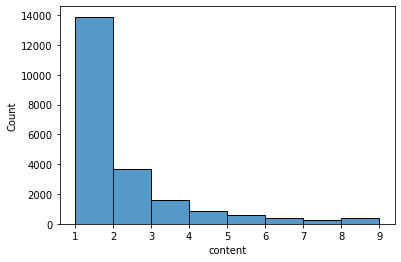

In [ ]:
sns.histplot(data=user_content_count[user_content_count < 10], binwidth=1, element="bars")

In [163]:
new_df = df.groupby(['created_at_r2', 'username'])['content'].count().to_frame().reset_index()
new_df

,created_at_r2,username,content
0,03-01,Cris_duh_123,2
1,03-01,bahiatodahora,1
2,03-01,diomarassuncao1,1
3,03-02,zoppodez,1
4,03-03,AecioBlog,1
...,...,...,...
43243,10-28,wellingtonmoura,1
43244,10-28,william0689ma,1
43245,10-28,xPiih,1
43246,10-28,xandaodalapa,1


In [164]:
new_df = new_df.groupby(['created_at_r2']).agg(user_count=('username', 'count'), content_mean=('content','mean')).reset_index()

In [165]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   created_at_r2  242 non-null    object 
 1   user_count     242 non-null    int64  
 2   content_mean   242 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.8+ KB


In [166]:
new_df

,created_at_r2,user_count,content_mean
0,03-01,3,1.333333
1,03-02,1,1.000000
2,03-03,4,1.000000
3,03-04,2,1.000000
4,03-05,10,1.100000
...,...,...,...
237,10-24,1243,1.560740
238,10-25,2704,1.764793
239,10-26,2024,1.264822
240,10-27,811,1.399507


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


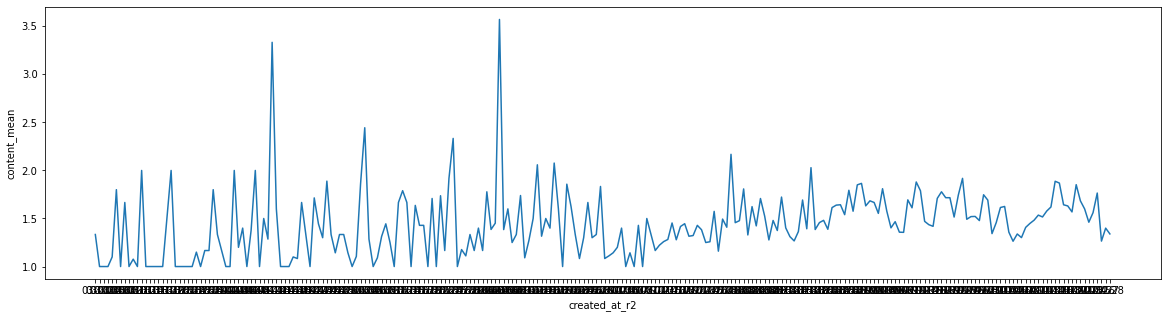

In [ ]:
#plt.subplots(1,2, figsize=(18,5)
plt.figure(figsize=(20,5))
sns.lineplot(new_df.created_at_r2, new_df.content_mean)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


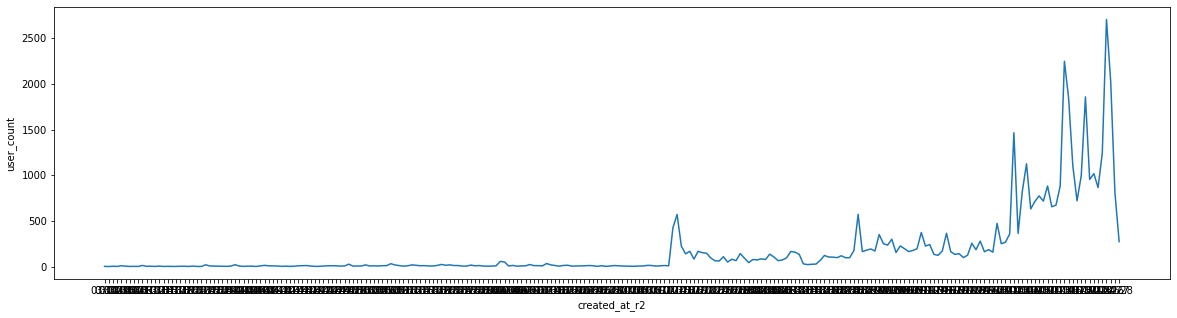

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(new_df.created_at_r2, new_df.user_count)